In [12]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pmdarima.arima import auto_arima
from datetime import datetime
import matplotlib.pyplot as plt
import tsfresh
from pmdarima.arima import ADFTest
from tsfresh import extract_features

In [31]:
values = read_csv("../../../daily-minimum-temperatures-in-me.csv")

In [32]:
values = read_csv("../../Time_series_data.csv")

In [33]:
len(values.index)

3650

In [34]:
values = values.rename(columns={values.columns[1]: 'Data'})

In [35]:
values = values.rename(columns={values.columns[0]: 'Time'})

In [36]:
values['Time'] = pd.to_datetime(values['Time'], errors = 'coerce')
# values.set_index('Month', inplace=True)

In [37]:
values

,Time,Data
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [38]:
missing_values_count = values.isna().sum().sum()
print(missing_values_count)

0


In [39]:
values['ID'] = 'Duy'

In [40]:
# Trích xuất các đặc trưng của chuỗi thời gian
# default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())

In [41]:
features = extract_features(values,column_id='ID',column_sort='Time')

Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]

Feature Extraction:   0%|          | 0/1 [00:05<?, ?it/s]


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
list(features.columns)

['Data__variance_larger_than_standard_deviation',
 'Data__has_duplicate_max',
 'Data__has_duplicate_min',
 'Data__has_duplicate',
 'Data__sum_values',
 'Data__abs_energy',
 'Data__mean_abs_change',
 'Data__mean_change',
 'Data__mean_second_derivative_central',
 'Data__median',
 'Data__mean',
 'Data__length',
 'Data__standard_deviation',
 'Data__variation_coefficient',
 'Data__variance',
 'Data__skewness',
 'Data__kurtosis',
 'Data__root_mean_square',
 'Data__absolute_sum_of_changes',
 'Data__longest_strike_below_mean',
 'Data__longest_strike_above_mean',
 'Data__count_above_mean',
 'Data__count_below_mean',
 'Data__last_location_of_maximum',
 'Data__first_location_of_maximum',
 'Data__last_location_of_minimum',
 'Data__first_location_of_minimum',
 'Data__percentage_of_reoccurring_values_to_all_values',
 'Data__percentage_of_reoccurring_datapoints_to_all_datapoints',
 'Data__sum_of_reoccurring_values',
 'Data__sum_of_reoccurring_data_points',
 'Data__ratio_value_number_to_time_series_le

In [ ]:
from tsfresh.feature_extraction import feature_calculators as fc

In [ ]:
print(values.mean())

Data    4761.152381
dtype: float64


C:\Users\haman\AppData\Local\Temp\ipykernel_15200\4272790207.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(values.mean())
C:\Users\haman\AppData\Local\Temp\ipykernel_15200\4272790207.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(values.mean())


In [ ]:
features.Data__skewness[0]

1.639003039912007

In [ ]:
features.head()

,Data__variance_larger_than_standard_deviation,Data__has_duplicate_max,Data__has_duplicate_min,Data__has_duplicate,Data__sum_values,Data__abs_energy,Data__mean_abs_change,Data__mean_change,Data__mean_second_derivative_central,Data__median,...,Data__fourier_entropy__bins_5,Data__fourier_entropy__bins_10,Data__fourier_entropy__bins_100,Data__permutation_entropy__dimension_3__tau_1,Data__permutation_entropy__dimension_4__tau_1,Data__permutation_entropy__dimension_5__tau_1,Data__permutation_entropy__dimension_6__tau_1,Data__permutation_entropy__dimension_7__tau_1,Data__query_similarity_count__query_None__threshold_0.0,Data__mean_n_absolute_max__number_of_maxima_7
Duy,1.0,0.0,0.0,1.0,499921.0,3.058319e+09,1706.134615,29.442308,22.364078,4217.0,...,0.503697,0.740358,1.737117,1.603377,2.55465,3.349209,3.818559,4.122632,NaN,11757.857143


In [ ]:
features.Data__maximum

Duy    13916.0
Name: Data__maximum, dtype: float64

In [ ]:
plt.plot(values['Month'],values['Data'])
plt.title('Biểu đồ dữ liệu chuỗi thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.show()

KeyError: 'Month'

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

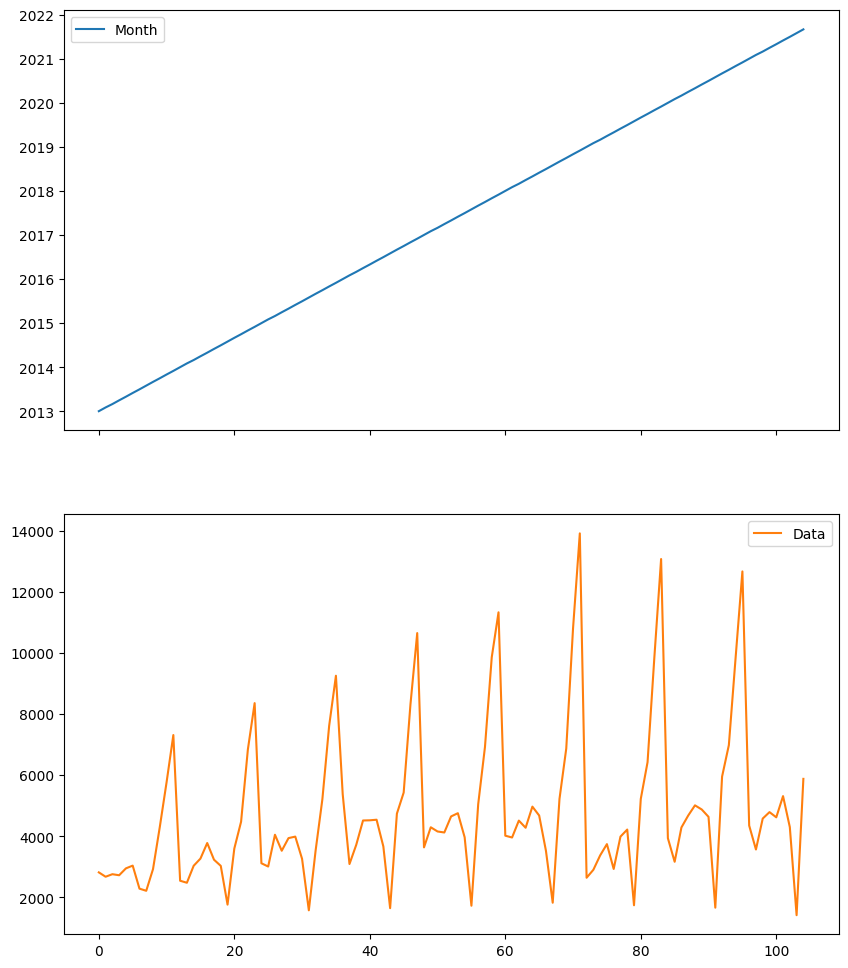

In [ ]:
values.plot(subplots=True, figsize=(10, 12))

In [ ]:
features.Data__sum_values[0]

499921.0

In [ ]:
df.fillna(0, inplace=True)
df.fillna(method='ffill', inplace=True)  # Điền giá trị trước
df.fillna(method='bfill', inplace=True)  # Điền giá trị sau
mean_value = df['column_name'].mean()
df['column_name'].fillna(mean_value, inplace=True)

median_value = df['column_name'].median()
df['column_name'].fillna(median_value, inplace=True)

std_value = df['column_name'].std()

df['column_name'].fillna(std_value, inplace=True)
df['column_name'].fillna('Unknown', inplace=True, mask=df['column_name'].notnull())


NameError: name 'df' is not defined